Imports

In [2]:
from IPython.display import Markdown as md, display
import pandas as pd
from matplotlib import MatplotlibDeprecationWarning
from statsmodels.tools.sm_exceptions import ConvergenceWarning, HessianInversionWarning
import data_processing as dproc
import plot as plot
import warnings

# ignore these warning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=HessianInversionWarning)
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

# Cleaning and analysing raw data

Southern Ring Road of Ljubljana  Var:  3374499.8176657874  Mean:  3057.687174541948


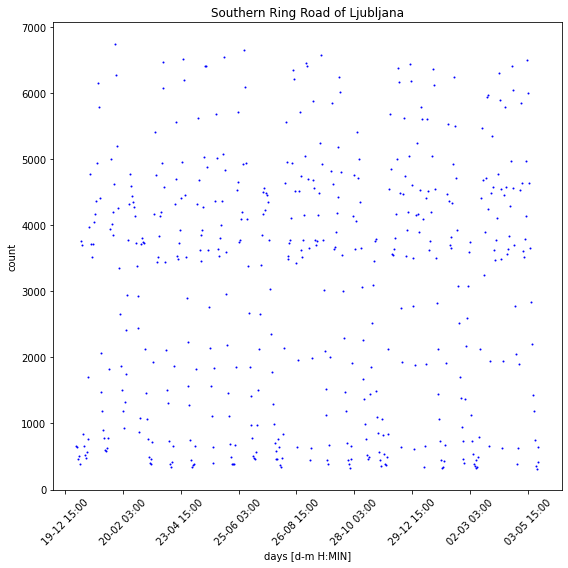

In [3]:
df = pd.read_csv(r'..\data\df_2019.csv')
df = dproc.clean_data(df)
plot.plot_raw_data([df], ["Southern Ring Road of Ljubljana"], [1500])

# Building models

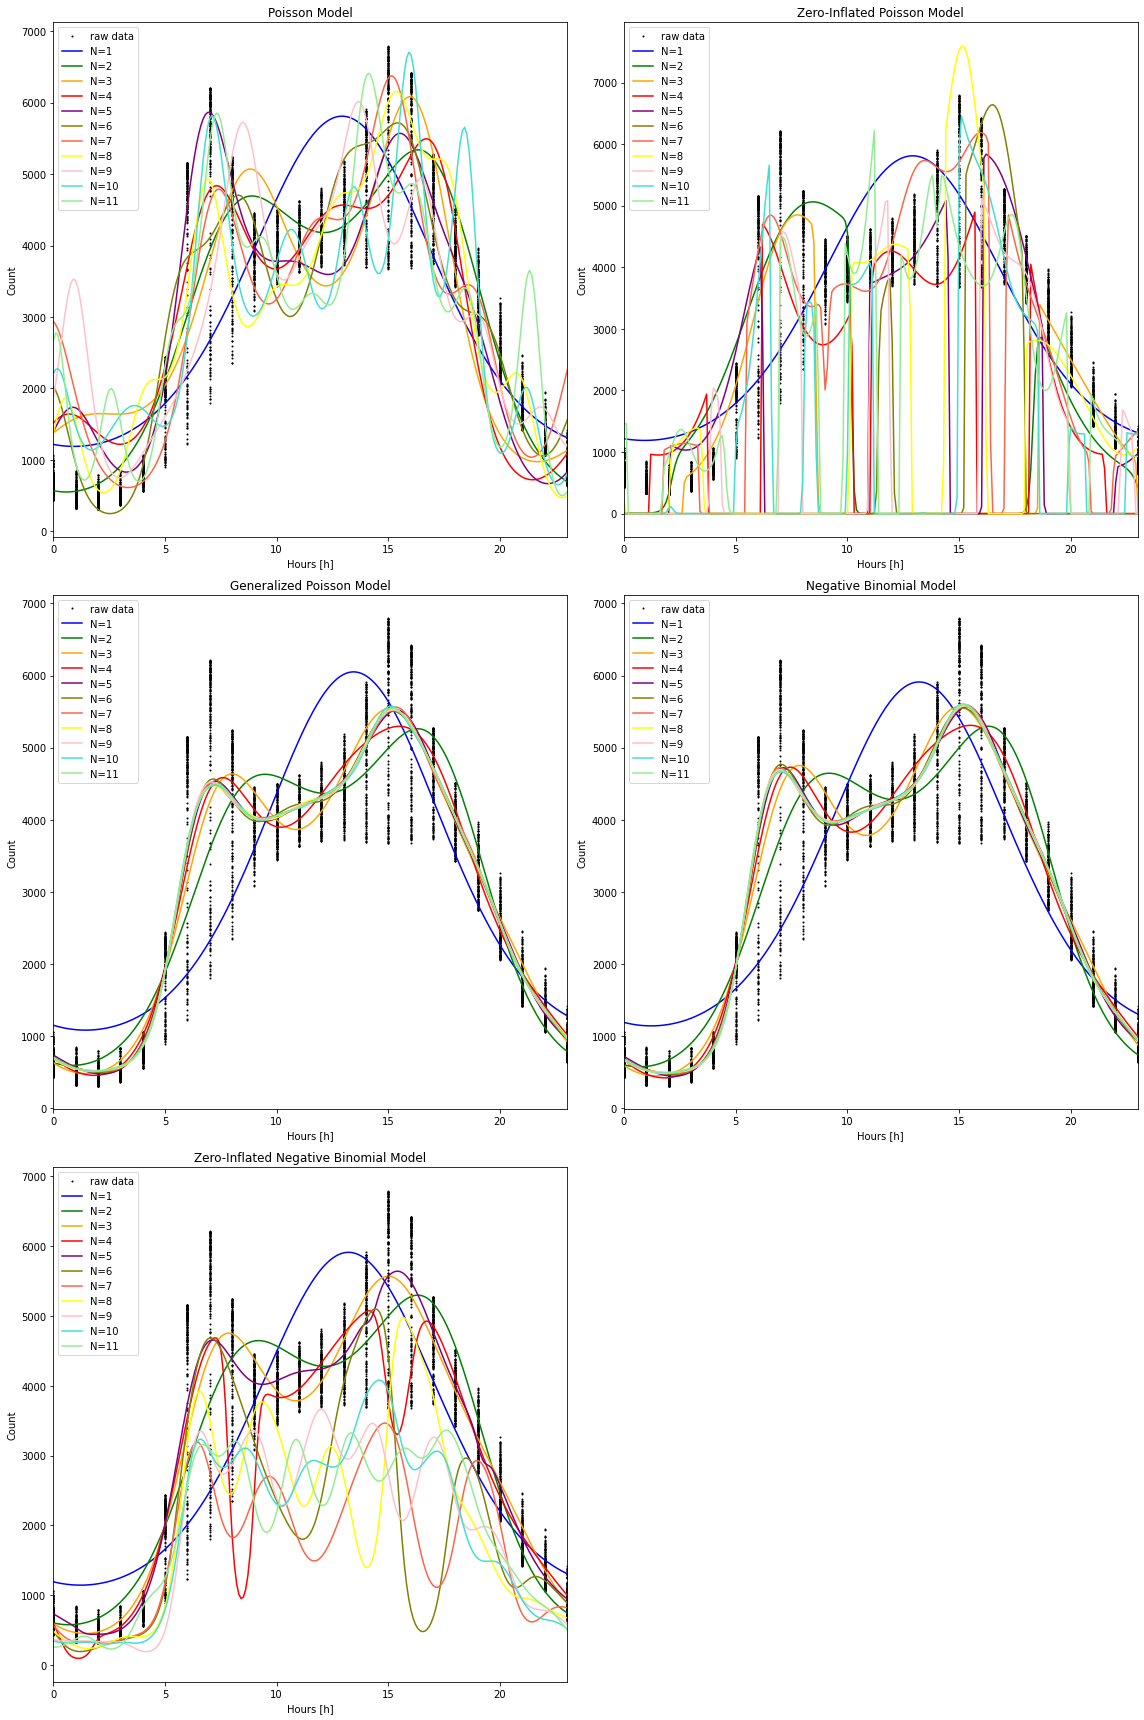

,model_type,n_components,amplitude,mesor,peaks,heights,p,RSS,AIC,BIC,log_likelihood,logs,mean(est),Y(est)
0,poisson,1,2310.539988,3499.232055,[12.912912912912914],[5809.772042687765],1.110223e-16,6.362619e+09,2.203995e+06,2.204014e+06,-1.101994e+06,"[-144.59713541494375, -173.53495101465296, -39...",3057.620620,"[1188.8347200697049, 1226.1294089421456, 1332...."
1,poisson,2,2394.399812,2944.966335,"[8.90890890890891, 16.316316316316318]","[4693.298515769649, 5339.366147415741]",1.110223e-16,2.812110e+09,9.105555e+05,9.105882e+05,-4.552727e+05,"[-12.627608722124478, -4.544606543997361, -145...",3057.730368,"[559.8745958094647, 663.7387179096863, 914.808..."
2,poisson,3,2553.283801,3528.610077,"[8.80880880880881, 15.915915915915917]","[5071.466259687032, 6081.893877825089]",1.110223e-16,5.190179e+09,2.272227e+06,2.272272e+06,-1.136106e+06,"[-348.1487725253346, -405.35268594016316, -604...",3056.904524,"[1580.213255109423, 1647.1666573262619, 1640.6..."
3,poisson,4,2385.736795,3108.041928,"[7.307307307307307, 13.013013013013014, 16.716...","[4837.531814761244, 4566.00476966866, 5493.778...",1.110223e-16,3.874357e+09,1.958392e+06,1.958451e+06,-9.791869e+05,"[-372.2626177166003, -247.94651429017858, -318...",3055.653337,"[1621.246538080126, 1373.1143791723846, 1218.5..."
4,poisson,5,2598.218956,3265.880247,"[7.007007007007007, 15.515515515515517]","[5864.099203364211, 5570.539297166135]",1.110223e-16,3.321464e+09,1.495688e+06,1.495760e+06,-7.478329e+05,"[-437.1734966692384, -187.0778220263196, -114....",3059.662989,"[1728.3966796072427, 1254.1624815321545, 850.2..."
5,poisson,6,2734.337643,2982.732389,"[8.308308308308309, 15.415415415415417]","[4704.69166488694, 5717.070031053733]",1.110223e-16,3.267573e+09,1.249147e+06,1.249232e+06,-6.245606e+05,"[-53.80393256793286, -141.0284889246318, -43.0...",3056.654954,"[950.0830891269605, 307.9352825356589, 292.319..."
6,poisson,7,2880.346581,3493.822475,"[7.407407407407407, 15.115115115115117]","[4789.941965462093, 6374.169056446449]",1.110223e-16,4.932691e+09,2.124078e+06,2.124176e+06,-1.062024e+06,"[-554.630170220672, -66.53981133647312, -31.70...",3060.065124,"[1912.7391542641271, 966.8474566179855, 634.01..."
7,poisson,8,2842.966797,3313.828860,"[6.906906906906907, 15.315315315315317, 17.217...","[4931.03043313855, 6156.795656852026, 5211.454...",1.110223e-16,3.640825e+09,1.505147e+06,1.505258e+06,-7.525565e+05,"[-314.5310284812431, -7.201294524106288, -113....",3059.369994,"[1521.6869377520825, 580.4789726589372, 849.28..."
8,poisson,9,2630.427000,3381.124216,"[8.508508508508509, 13.613613613613614, 16.416...","[5723.122572025639, 6011.551216780753, 4942.92...",1.110223e-16,7.312447e+09,2.709145e+06,2.709269e+06,-1.354553e+06,"[-1749.5451583849672, -270.79904169063275, -71...",3113.894933,"[3507.939122113199, 1415.4162953069479, 750.60..."
9,poisson,10,3026.517623,3678.156363,"[7.107107107107107, 15.915915915915917, 18.418...","[5819.236134093448, 6704.673985438956, 5654.44...",1.110223e-16,6.044707e+09,2.471741e+06,2.471879e+06,-1.235849e+06,"[-288.8934516628183, -151.9134377875357, -589....",3010.262505,"[1475.8734489462518, 1179.8398694540285, 1619...."


In [4]:
models_type = ['poisson', 'zero_poisson', 'gen_poisson', 'nb', 'zero_nb']
n_components = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# fit to models
df_results = dproc.fit_to_models(df, models_type, n_components)
display(df_results)

# Comparing fitted models
## First compare by model type

In [5]:
best_model_type = dproc.get_best_model_type(df_results, 'Vuong')
print("Best model: {}".format(best_model_type.model_type))
best_model = dproc.get_best_n_components(df_results, 'Vuong', model_type=best_model_type['model_type'])
print("Number of components: {}".format(best_model.n_components))

Best model: gen_poisson
Number of components: 9


## First compare by number of components

In [6]:
best_n_components = dproc.get_best_n_components(df_results, 'Vuong')
print("Number of components: {}".format(best_n_components.n_components))
best_model = dproc.get_best_model_type(df_results, 'Vuong', n_components=best_n_components['n_components'])
print("Best model: {}".format(best_model.model_type))


Number of components: 7
Best model: gen_poisson


We will use the result from the second comparison as the best model.

In [7]:
model_type = best_model.model_type
n_components = int(best_model.n_components)
print("Best model: {}  Number of components: {}".format(best_model.model_type,best_model.n_components))

Best model: gen_poisson  Number of components: 7


# Best model and its CIs

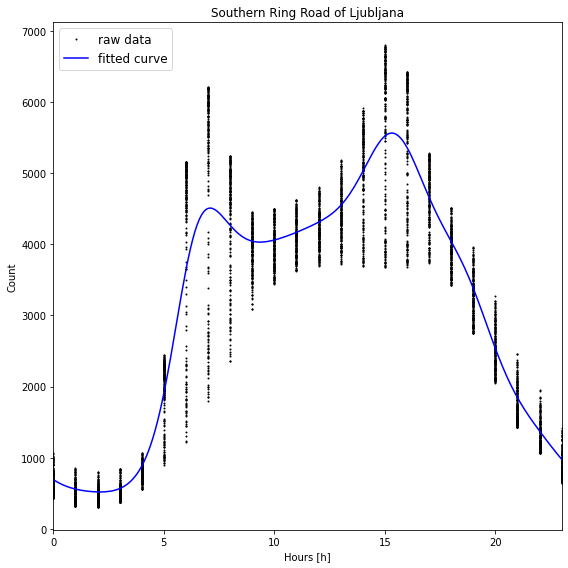

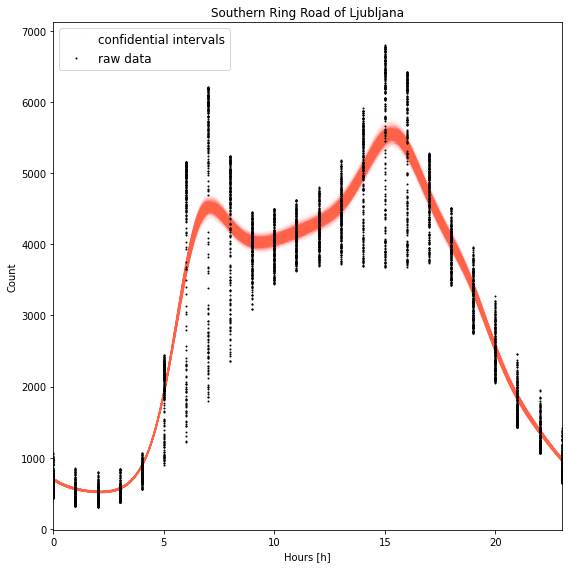

In [8]:
plot.plot_best_models([df], [model_type], [n_components], title=['Southern Ring Road of Ljubljana'])
plot.plot_confidential_intervals([df], [model_type], [n_components], title=['Southern Ring Road of Ljubljana'])

# Compare by one component - effect of COVID-19
## All days

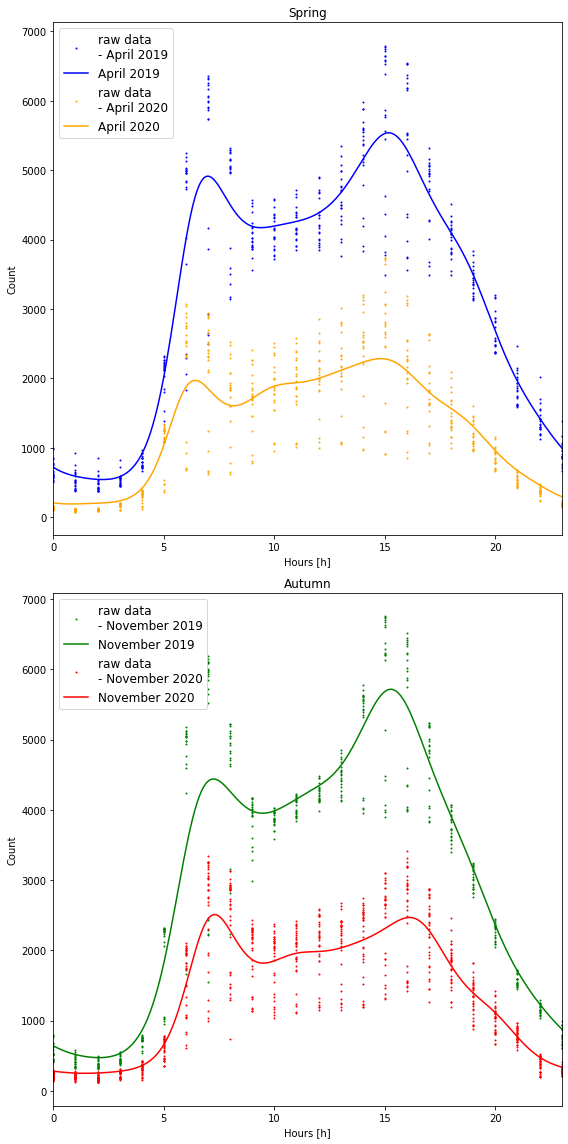

,observation_period,amplitude,mesor,peaks,heights,amplitude_CIs,mesor_CIs
0,April 2019,2498.821473,3040.382282,"[7.007007007007007, 15.215215215215217]","[4915.050076575587, 5539.203755211133]","[2401.6690075094857, 2607.0523901909573]","[2928.960614268549, 3145.8183928624767]"
1,November 2019,2620.799291,3094.353319,"[7.207207207207207, 15.315315315315317]","[4439.168981667693, 5715.152610225097]","[2500.438690299582, 2743.9335433834513]","[2965.8426934641034, 3217.674083618544]"
2,April 2020,1047.608854,1236.862456,"[6.406406406406407, 14.814814814814815]","[1971.4194512693866, 2284.4713101979532]","[954.2754563920917, 1146.605600346993]","[1138.2760881100942, 1331.3656492655134]"
3,November 2020,1129.780276,1380.641905,"[7.307307307307307, 16.116116116116117]","[2510.422180726571, 2467.9729928325096]","[1075.5117187958076, 1226.1489348733676]","[1325.7892786502857, 1471.4850795898537]"


In [9]:
df_covid = pd.read_csv(r'..\data\df_covid.csv')
df_results = dproc.compare_by_component(df_covid, 'observation_period', n_components, model_type, ax_indices=[0, 1, 0, 1],
                           ax_titles=['Spring', 'Autumn'], rows=2, cols=1,save_file_to='comparison1.pdf')
display(df_results[['observation_period','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs']])

## Only weekends

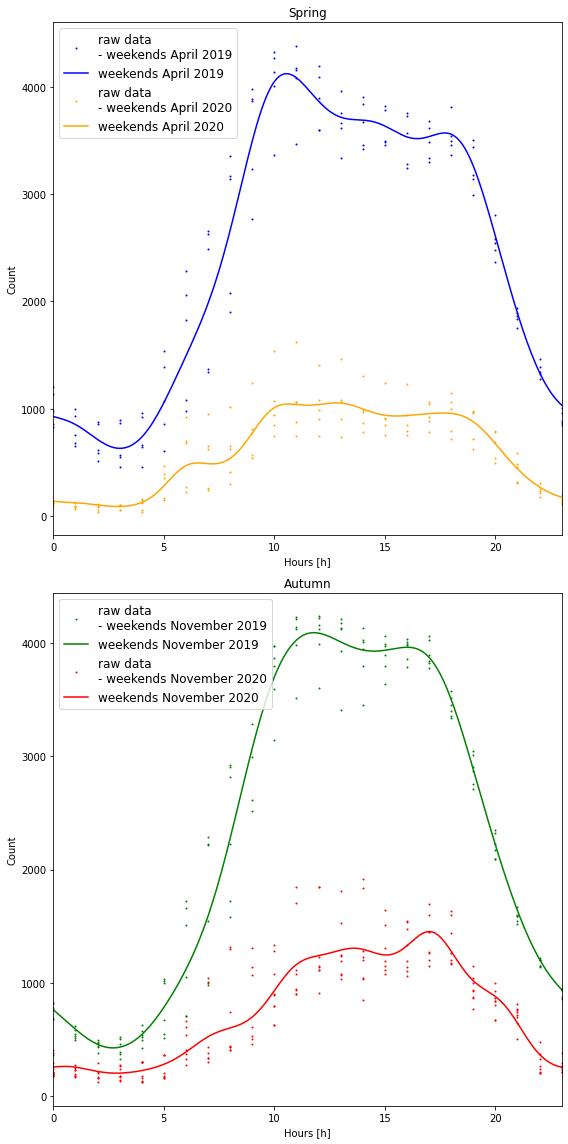

,observation_period,amplitude,mesor,peaks,heights,amplitude_CIs,mesor_CIs
0,weekends April 2019,1745.594299,2376.794887,"[10.51051051051051, 17.71771771771772]","[4122.389186009278, 3569.9072131936414]","[1661.850921966621, 1892.4873472783668]","[2285.4805832320017, 2533.5959163418383]"
1,weekends November 2019,1832.399922,2257.932945,"[11.811811811811813, 16.016016016016017]","[4090.3328670787887, 3961.9198700284496]","[1783.2535678674203, 1887.9025827395703]","[2234.4841137981134, 2314.6786408673793]"
2,weekends April 2020,482.903514,571.969170,"[10.61061061061061, 12.812812812812814, 17.617...","[1044.2396129336553, 1054.8726839162962, 960.3...","[462.7913214656722, 541.7852721490036]","[552.5247147829378, 623.2243817296907]"
3,weekends November 2020,624.916204,827.344625,"[13.613613613613614, 17.017017017017018]","[1305.4373355587381, 1452.2608290311932]","[577.3435338132383, 670.0883232664517]","[773.4912031251353, 868.3738077552661]"


In [10]:
df_covid = pd.read_csv(r'..\data\df_covid_weekends.csv')
df_results = dproc.compare_by_component(df_covid, 'observation_period', n_components, model_type, ax_indices=[0, 1, 0, 1],
                           ax_titles=['Spring', 'Autumn'], rows=2, cols=1,save_file_to='comparison2.pdf')
display(df_results[['observation_period','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs']])

## Only work days

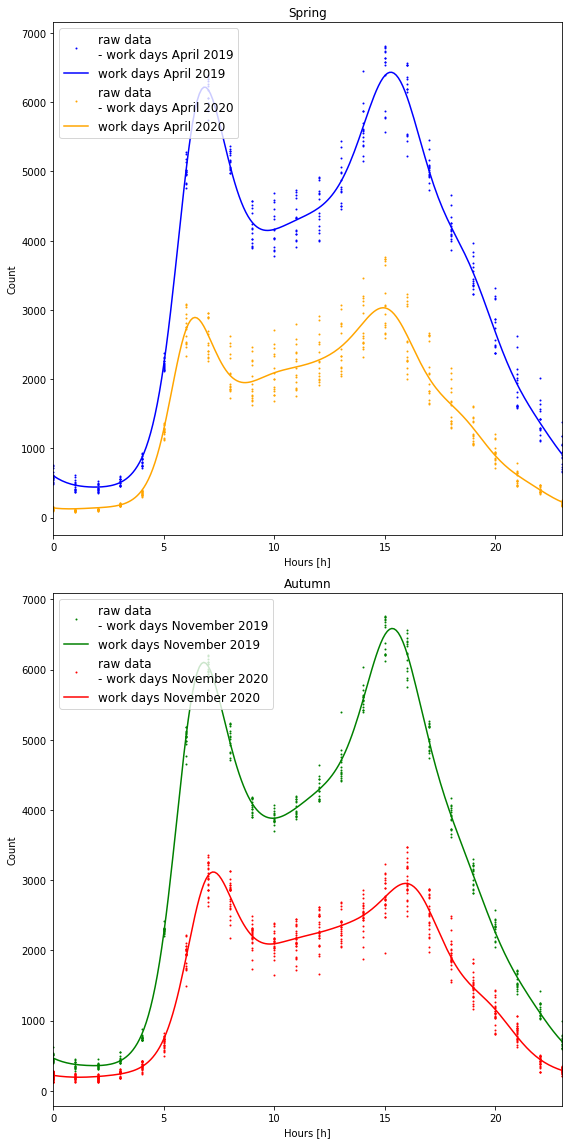

,observation_period,amplitude,mesor,peaks,heights,amplitude_CIs,mesor_CIs
0,work days April 2019,2995.544173,3437.101717,"[6.806806806806807, 15.315315315315317]","[6217.273123375808, 6432.645889598069]","[2930.7269832935885, 3079.2622215834995]","[3368.6067885759776, 3524.7836406964207]"
1,work days November 2019,3112.723621,3472.959744,"[6.806806806806807, 15.315315315315317]","[6102.972628655784, 6585.683365394885]","[3084.5793831160026, 3146.1368609436577]","[3439.450699971675, 3505.3038579771055]"
2,work days April 2020,1452.390438,1579.271713,"[6.406406406406407, 14.914914914914915]","[2892.088730011034, 3031.6621517050025]","[1393.7724836319387, 1506.670401303916]","[1517.702045614622, 1634.3716402540695]"
3,work days November 2020,1461.281282,1656.234551,"[7.207207207207207, 15.915915915915917]","[3117.515832911313, 2955.0594921218044]","[1435.8451268936683, 1490.9812728868806]","[1634.6741991675615, 1683.74410462008]"


In [11]:
df_covid = pd.read_csv(r'..\data\df_covid_workdays.csv')
df_results = dproc.compare_by_component(df_covid, 'observation_period', n_components, model_type, ax_indices=[0, 1, 0, 1],
                           ax_titles=['Spring', 'Autumn'], rows=2, cols=1,save_file_to='comparison3.pdf')
display(df_results[['observation_period','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs']])